In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot
import matplotlib


#  PART 1: Obtain small subset (10000 samples) of original data by reading line by line
#  Call it: new_file('201609-citibike-tripdata.csv','small_file.csv', 10000, 0.1)
#
# def new_file(input, output, num_lines, threshold):

#     g=open(output, 'w')
#     first_line = True
#     count_line = 0

#     with open(input,'r') as f:    # with automatically open/close no need statement
#         for line in f:
#             if first_line:
#                 g.write(line)
#                 first_line = False
#             elif np.random.rand(1) < threshold:
#                 type(threshold)
#                 g.write(line)
#                 count_line = count_line + 1
#                 if count_line == num_lines:
#                     break
#     g.close()

# new_file('Merged_July_2016_Bike.csv','subset_file.csv', 10000, 0.01)

df = pd.read_csv('data/January_2016.csv')
dfv = df['birth year'].value_counts(dropna=False)
print(len(dfv))
print(df.columns)

# PART 2: Change format for starttime and stoptime columns
# At the end of this part, we obtain new columns.
#
# date_startlist = []
# time_startlist = []
# date_stoplist = []
# time_stoplist = []
#
# def split_start(row):
#     date, time = (row.split(" ", 1))
#     date_startlist.append(date)
#     time_startlist.append(time)
#     # print(date_list)
#     # print(time)
#     # print((time_startlist))
#     return date_startlist,time_startlist
#
# def split_stop(row):
#     date, time = (row.split(" ", 1))
#     date_stoplist.append(date)
#     time_stoplist.append(time)
#     # print(date_list)
#     # print(time)
#     # print((time_startlist))
#     return date_stoplist,time_stoplist
#
#
# df_start = df['starttime']
# df_start.apply(lambda row: split_start(row))
#
# df_stop = df['stoptime']
# df_stop.apply(lambda row: split_stop(row))
#
# df_startdate = pd.DataFrame({'start_date':date_startlist})
# df_starttime= pd.DataFrame({'start_time':time_startlist})
# df_stopdate = pd.DataFrame({'stop_date':date_stoplist})
# df_stoptime= pd.DataFrame({'stop_time':time_stoplist})
#
# df_additional = pd.DataFrame({'start_date':date_startlist,'start_time':time_startlist,'stop_date':date_stoplist,'stop_time':time_stoplist})
# # print(len(df_additional))
# # print(df_additional.columns)

# df.drop(['starttime', 'stoptime'], axis=1, inplace=True)
# df_final = df.join(df_additional, how='outer')
# assert(len(df_final.columns)==17)


# PART 3: Merge Files

# df_bike = pd.read_csv('July_2016_Bike.csv')
# df_bike.drop(df_bike.columns[[0]], axis=1, inplace=True)
# # # # print(len(df1))
# df_weather = pd.read_csv('July_2016_Weather.csv')
# # # # print(len(df2))
# # # # assert(len(df1)==len(df2))
#
#
# df_merged= pd.merge(df_bike, df_weather,  how='left', left_on=['start_weather_time','start_date'], right_on = ['Time','Date'])
# print(df_merged.columns)
# print(len(df_merged.columns))
# print(len(df_merged))
#
# df_merged.to_csv("July2016_Bike_Weather.csv")
# assert(len(df_bike)==len(df_merged))

print('done')


77
Index(['tripduration', 'start station id', 'start station name',
       'start station latitude', 'start station longitude', 'end station id',
       'end station name', 'end station latitude', 'end station longitude',
       'usertype', 'birth year', 'gender', 'start_time', 'stop_time', 'Date',
       'Time', 'humidity', 'TempF', 'WeatherDesc', 'WindSpeedMiles', 'Day'],
      dtype='object')
done


Pershing Square North              6272
W 21 St & 6 Ave                    4693
Lafayette St & E 8 St              4408
E 17 St & Broadway                 3965
Broadway & E 14 St                 3690
8 Ave & W 33 St                    3506
Broadway & E 22 St                 3449
W 41 St & 8 Ave                    3408
W 20 St & 11 Ave                   3052
W 18 St & 6 Ave                    3031
Greenwich Ave & 8 Ave              2948
Carmine St & 6 Ave                 2938
Cleveland Pl & Spring St           2933
E 47 St & Park Ave                 2866
W 31 St & 7 Ave                    2836
8 Ave & W 31 St                    2823
W 38 St & 8 Ave                    2800
Broadway & W 24 St                 2787
Lafayette St & Jersey St           2743
Christopher St & Greenwich St      2708
1 Ave & E 15 St                    2699
E 32 St & Park Ave                 2631
W 24 St & 7 Ave                    2593
Pershing Square South              2589
W 33 St & 7 Ave                    2487


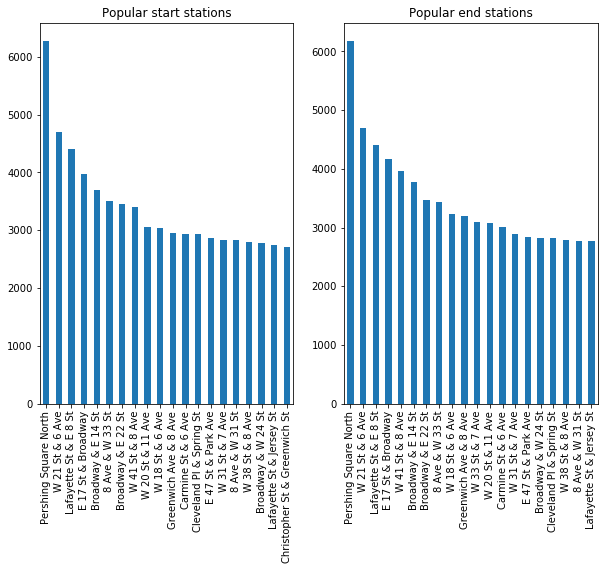

done


In [2]:
# Popular start/end stations

df1=df['start station name'].value_counts()
print(df1)
df_start = df1.nlargest(20)

df2=df['end station name'].value_counts()
df_end = df2.nlargest(20)

plt.figure(1)
plt.subplot(121)
df_start.plot.bar(title='Popular start stations', figsize=(10,7))
plt.subplot(122)
df_end.plot.bar(title='Popular end stations', figsize=(10,7))
plt.show()

print('done')


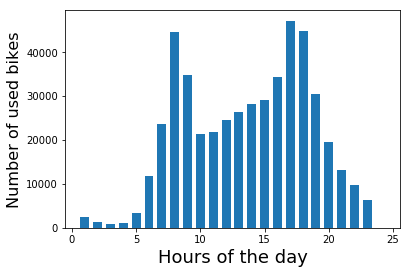

In [15]:
# Usage based on hours

import numpy as np
df1 = df['start_time']
df['start_hour'] = df1.str[:2].astype(int)
# print(df['start_hour'].dtype)


hour = df['start_hour'].values


# np.histogram(hour, bin_edges=bins)

bins=(0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5,11.5,12.5,13.5,14.5,15.5,16.5,17.5,18.5,19.5,20.5,21.5,22.5,23.5,24.5) 
hist, bins = np.histogram((hour),bins)

width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.xlabel('Hours of the day', fontsize=18)
plt.ylabel('Number of used bikes', fontsize=16)
plt.show()




[]


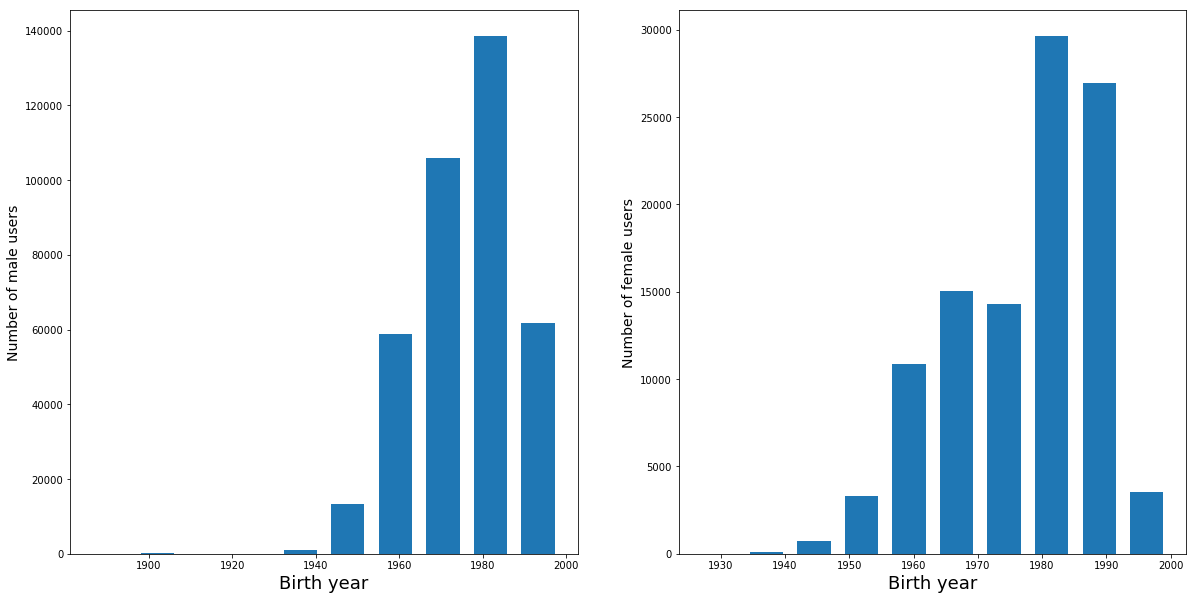

done


In [4]:
#  User profile: gender and age
import math

df1 = df['gender']
df2 = df['birth year']

df3 = df[['gender','birth year']]
df4 = df3[df3.gender != 0]

df5 = df4[df4.gender==1]
df6 = df4[df4.gender==2]

df_year1 = df5['birth year'].values
df_year2= df6['birth year'].values


# for i in df_year1:
#         print(i)

nanlist=[]
for ii in range(len(df_year1)):
    if np.isnan(df_year1[ii]):
        nanlist.append(ii)
print(nanlist)
df_yeargen1 = np.delete(df_year1, nanlist)



nanlist2=[]
for ii in range(len(df_year2)):
    if np.isnan(df_year2[ii]):
        nanlist2.append(ii)

df_yeargen2 = np.delete(df_year2, nanlist2)




plt.figure(1)
plt.figure(figsize=(20,10))

plt.subplot(121)

hist, bins = np.histogram(df_yeargen1)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.xlabel('Birth year', fontsize=18)
plt.ylabel('Number of male users', fontsize=14)

plt.subplot(122)


hist, bins = np.histogram(df_yeargen2)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.xlabel('Birth year', fontsize=18)
plt.ylabel('Number of female users', fontsize=14)
plt.show()

print('done')




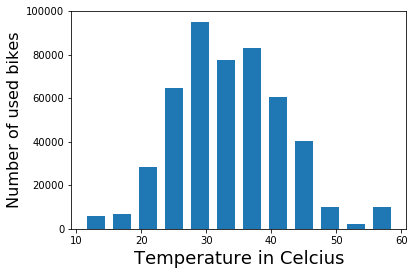

done


In [11]:
# Bike usage based on tempC

temp=df['TempF'].values
hist, bins = np.histogram((temp),bins=12)

width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.xlabel('Temperature in Fahrenheit', fontsize=18)
plt.ylabel('Number of used bikes', fontsize=16)
plt.show()

print('done')


In [6]:
# Monthly usage based on user type

df1 = pd.read_csv('data/January_2016_Bike.csv')
print(df1['usertype'].value_counts())
df2 = pd.read_csv('data/February_2016_Bike.csv')
print(df2['usertype'].value_counts())
df3 = pd.read_csv('data/March_2016_Bike.csv')
print(df3['usertype'].value_counts())
df4 = pd.read_csv('data/April_2016_Bike.csv')
print(df4['usertype'].value_counts())
df5 = pd.read_csv('data/May_2016_Bike.csv')
print(df5['usertype'].value_counts())
df6 = pd.read_csv('data/June_2016_Bike.csv')
print(df6['usertype'].value_counts())
df7 = pd.read_csv('data/July_2016_Bike.csv')
print(df7['usertype'].value_counts())
df8 = pd.read_csv('data/August_2016_Bike.csv')
print(df8['usertype'].value_counts())
df9 = pd.read_csv('data/September_2016_Bike.csv')
print(df9['usertype'].value_counts())
df10 = pd.read_csv('data/October_2016_Bike.csv')
print(df10['usertype'].value_counts())
df11 = pd.read_csv('data/November_2016_Bike.csv')
print(df11['usertype'].value_counts())
df12 = pd.read_csv('data/December_2016_Bike.csv')
print(df12['User Type'].value_counts())



Subscriber    484935
Customer       24543
Name: usertype, dtype: int64
Subscriber    531049
Customer       29825
Name: usertype, dtype: int64
Subscriber    826683
Customer       93238
Name: usertype, dtype: int64
Subscriber    882684
Customer      130465
Name: usertype, dtype: int64
Subscriber    1052266
Customer       160014
Name: usertype, dtype: int64
Subscriber    1303486
Customer       156832
Name: usertype, dtype: int64
Subscriber    1178219
Customer       201891
Name: usertype, dtype: int64
Subscriber    1339423
Customer       218240
Name: usertype, dtype: int64
Subscriber    1427639
Customer       221217
Name: usertype, dtype: int64
Subscriber    1402581
Customer       153342
Name: usertype, dtype: int64
Subscriber    1098468
Customer        85940
Name: usertype, dtype: int64
Subscriber    774278
Customer       32526
Name: User Type, dtype: int64


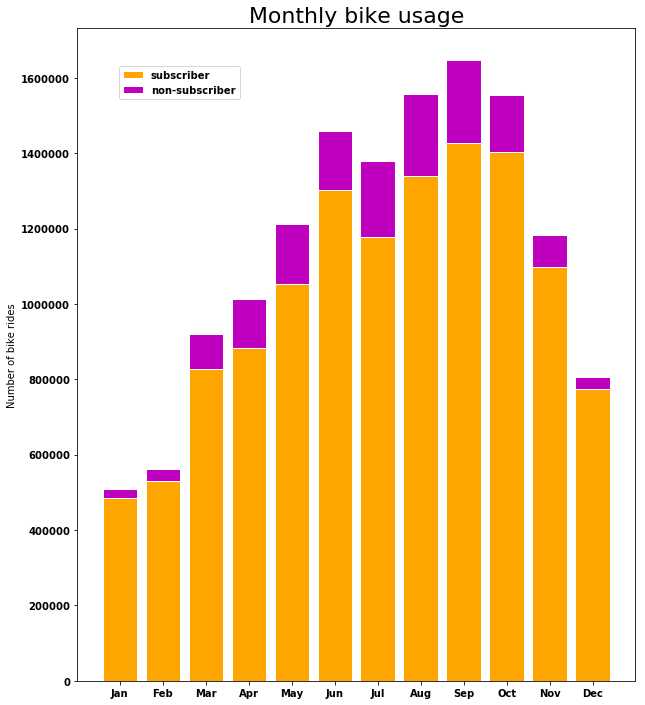

In [140]:

from matplotlib import rc


# y-axis in bold
rc('font', weight='bold',)  
 
# Values of each group
Subs = [484935, 531049, 826683,882684, 1052266, 1303486, 1178219, 1339423,1427639, 1402581,1098468, 774278 ]
Cust = [24543, 29825, 93238, 130465, 160014, 156832, 201891, 218240, 221217, 153342, 85940, 32526 ]
 

# The position of the bars on the x-axis
x = list(range(1,13))

# Names of group and bar width
names = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
 
# Create brown bars
plt.bar(x, Subs, color='orange', edgecolor='white', width=0.8)
# Create green bars (middle), on top of the firs ones
plt.bar(x, Cust, bottom=Subs, color='m', edgecolor='white', width=0.8)

# Custom axis
plt.xticks(x, names)
plt.legend(('subscriber', 'non-subscriber'), loc = 1, bbox_to_anchor=(0.3, 0.95))
plt.title('Monthly bike usage')
plt.ylabel('Number of bike rides')

# Show graphic
plt.show()


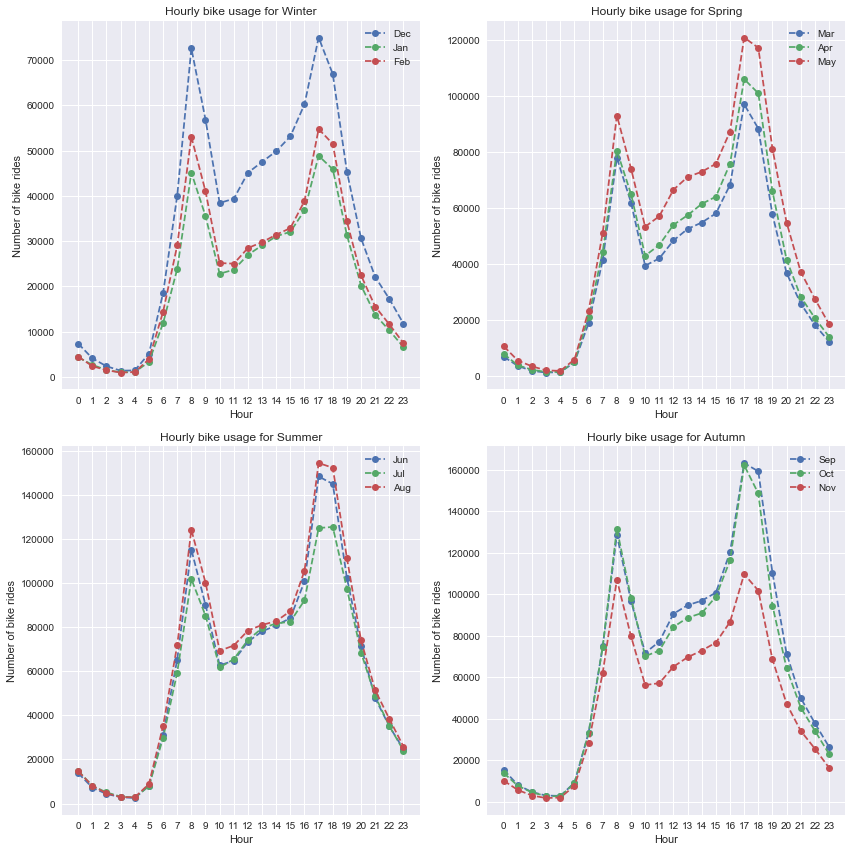

In [190]:
fig = plt.figure()
fig = plt.figure(figsize=(12,12))

y12 = df12['start_weather_time'].value_counts().sort_index()
y1 = df1['start_weather_time'].value_counts().sort_index()
y2 = df2['start_weather_time'].value_counts().sort_index()

# print(y)
b = (y12.index) // 100 
y12.index  = b
y1.index  = b
y2.index  = b


ax = fig.add_subplot(2,2,1)
ax.plot(y12,linestyle = 'dashed', marker = 'o', label = 'Dec' )
ax.plot(y1,linestyle = 'dashed', marker = 'o', label = 'Jan')
ax.plot(y2,linestyle = 'dashed', marker = 'o', label = 'Feb')
ax.set_xlabel('Hour')
ticks = ax.set_xticks(y1.index)
ax.set_ylabel('Number of bike rides')
ax.set_title('Hourly bike usage for Winter')
ax.legend(loc = 'best')


y3 = df3['start_weather_time'].value_counts().sort_index()
y4 = df4['start_weather_time'].value_counts().sort_index()
y5 = df5['start_weather_time'].value_counts().sort_index()

b = (y3.index) // 100 
y3.index  = b
y4.index  = b
y5.index  = b

ax = fig.add_subplot(2,2,2)

ax.plot(y3,linestyle = 'dashed', marker = 'o', label = 'Mar' )
ax.plot(y4,linestyle = 'dashed', marker = 'o', label = 'Apr')
ax.plot(y5,linestyle = 'dashed', marker = 'o', label = 'May')
ticks = ax.set_xticks(y1.index)
ax.set_xlabel('Hour')
ax.set_ylabel('Number of bike rides')
ax.set_title('Hourly bike usage for Spring')
ax.legend(loc = 'best')


y6 = df6['start_weather_time'].value_counts().sort_index()
y7 = df7['start_weather_time'].value_counts().sort_index()
y8 = df8['start_weather_time'].value_counts().sort_index()

b = (y6.index) // 100 
y6.index  = b
y7.index  = b
y8.index  = b

ax = fig.add_subplot(2,2,3)

ax.plot(y6,linestyle = 'dashed', marker = 'o', label = 'Jun' )
ax.plot(y7,linestyle = 'dashed', marker = 'o', label = 'Jul')
ax.plot(y8,linestyle = 'dashed', marker = 'o', label = 'Aug')
ticks = ax.set_xticks(y1.index)
ax.set_xlabel('Hour')
ax.set_ylabel('Number of bike rides')
ax.set_title('Hourly bike usage for Summer')
ax.legend(loc = 'best')

y9 = df9['start_weather_time'].value_counts().sort_index()
y10 = df10['start_weather_time'].value_counts().sort_index()
y11 = df11['start_weather_time'].value_counts().sort_index()

b = (y9.index) // 100 
y9.index  = b
y10.index  = b
y11.index  = b

ax = fig.add_subplot(2,2,4)

ax.plot(y9,linestyle = 'dashed', marker = 'o', label = 'Sep' )
ax.plot(y10,linestyle = 'dashed', marker = 'o', label = 'Oct')
ax.plot(y11,linestyle = 'dashed', marker = 'o', label = 'Nov')
ticks = ax.set_xticks(y1.index)
ax.set_xlabel('Hour')
ax.set_ylabel('Number of bike rides')
ax.set_title('Hourly bike usage for Autumn')
ax.legend(loc = 'best')

plt.tight_layout()

plt.show()


